In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Method

1. Import and convert Data
2. Split the dataset to 70:30 then test each Naive Bayes method on it
3. Split the dataset to 75:25 then test each Naive Bayes method on it
4. Split the dataset to 80:20 then test each Naive Bayes method on it
5. Graphs

1. Import and convert Data

In [2]:
# Import Cleaned Data
data = pd.read_csv("merged.csv")

In [3]:
# Transform each value in parameterwaterbody
# Using Ordinal Encoder to dummies the value
from sklearn.preprocessing import OrdinalEncoder
from itertools import chain
encoder = OrdinalEncoder()
data[["parameterWaterBodyCategory"]] = encoder.fit_transform(data[["parameterWaterBodyCategory"]])

encoder_serial_number = encoder.categories_                              # Stored the Categories
encoder_serial_number = list(chain.from_iterable(encoder_serial_number)) # Flatten
encoder_data_set = pd.DataFrame( {"Number": range(len(encoder_serial_number)), 
                                  "Data": encoder_serial_number})

In [4]:
from sklearn.preprocessing import OrdinalEncoder
from itertools import chain
encoder = OrdinalEncoder()
data[["CountryCode"]] = encoder.fit_transform(data[["CountryCode"]])

encoder_serial_number = encoder.categories_                              # Stored the Categories
encoder_serial_number = list(chain.from_iterable(encoder_serial_number)) # Flatten
encoder_data_set = pd.DataFrame( {"Number": range(len(encoder_serial_number)), 
                                  "Data": encoder_serial_number})

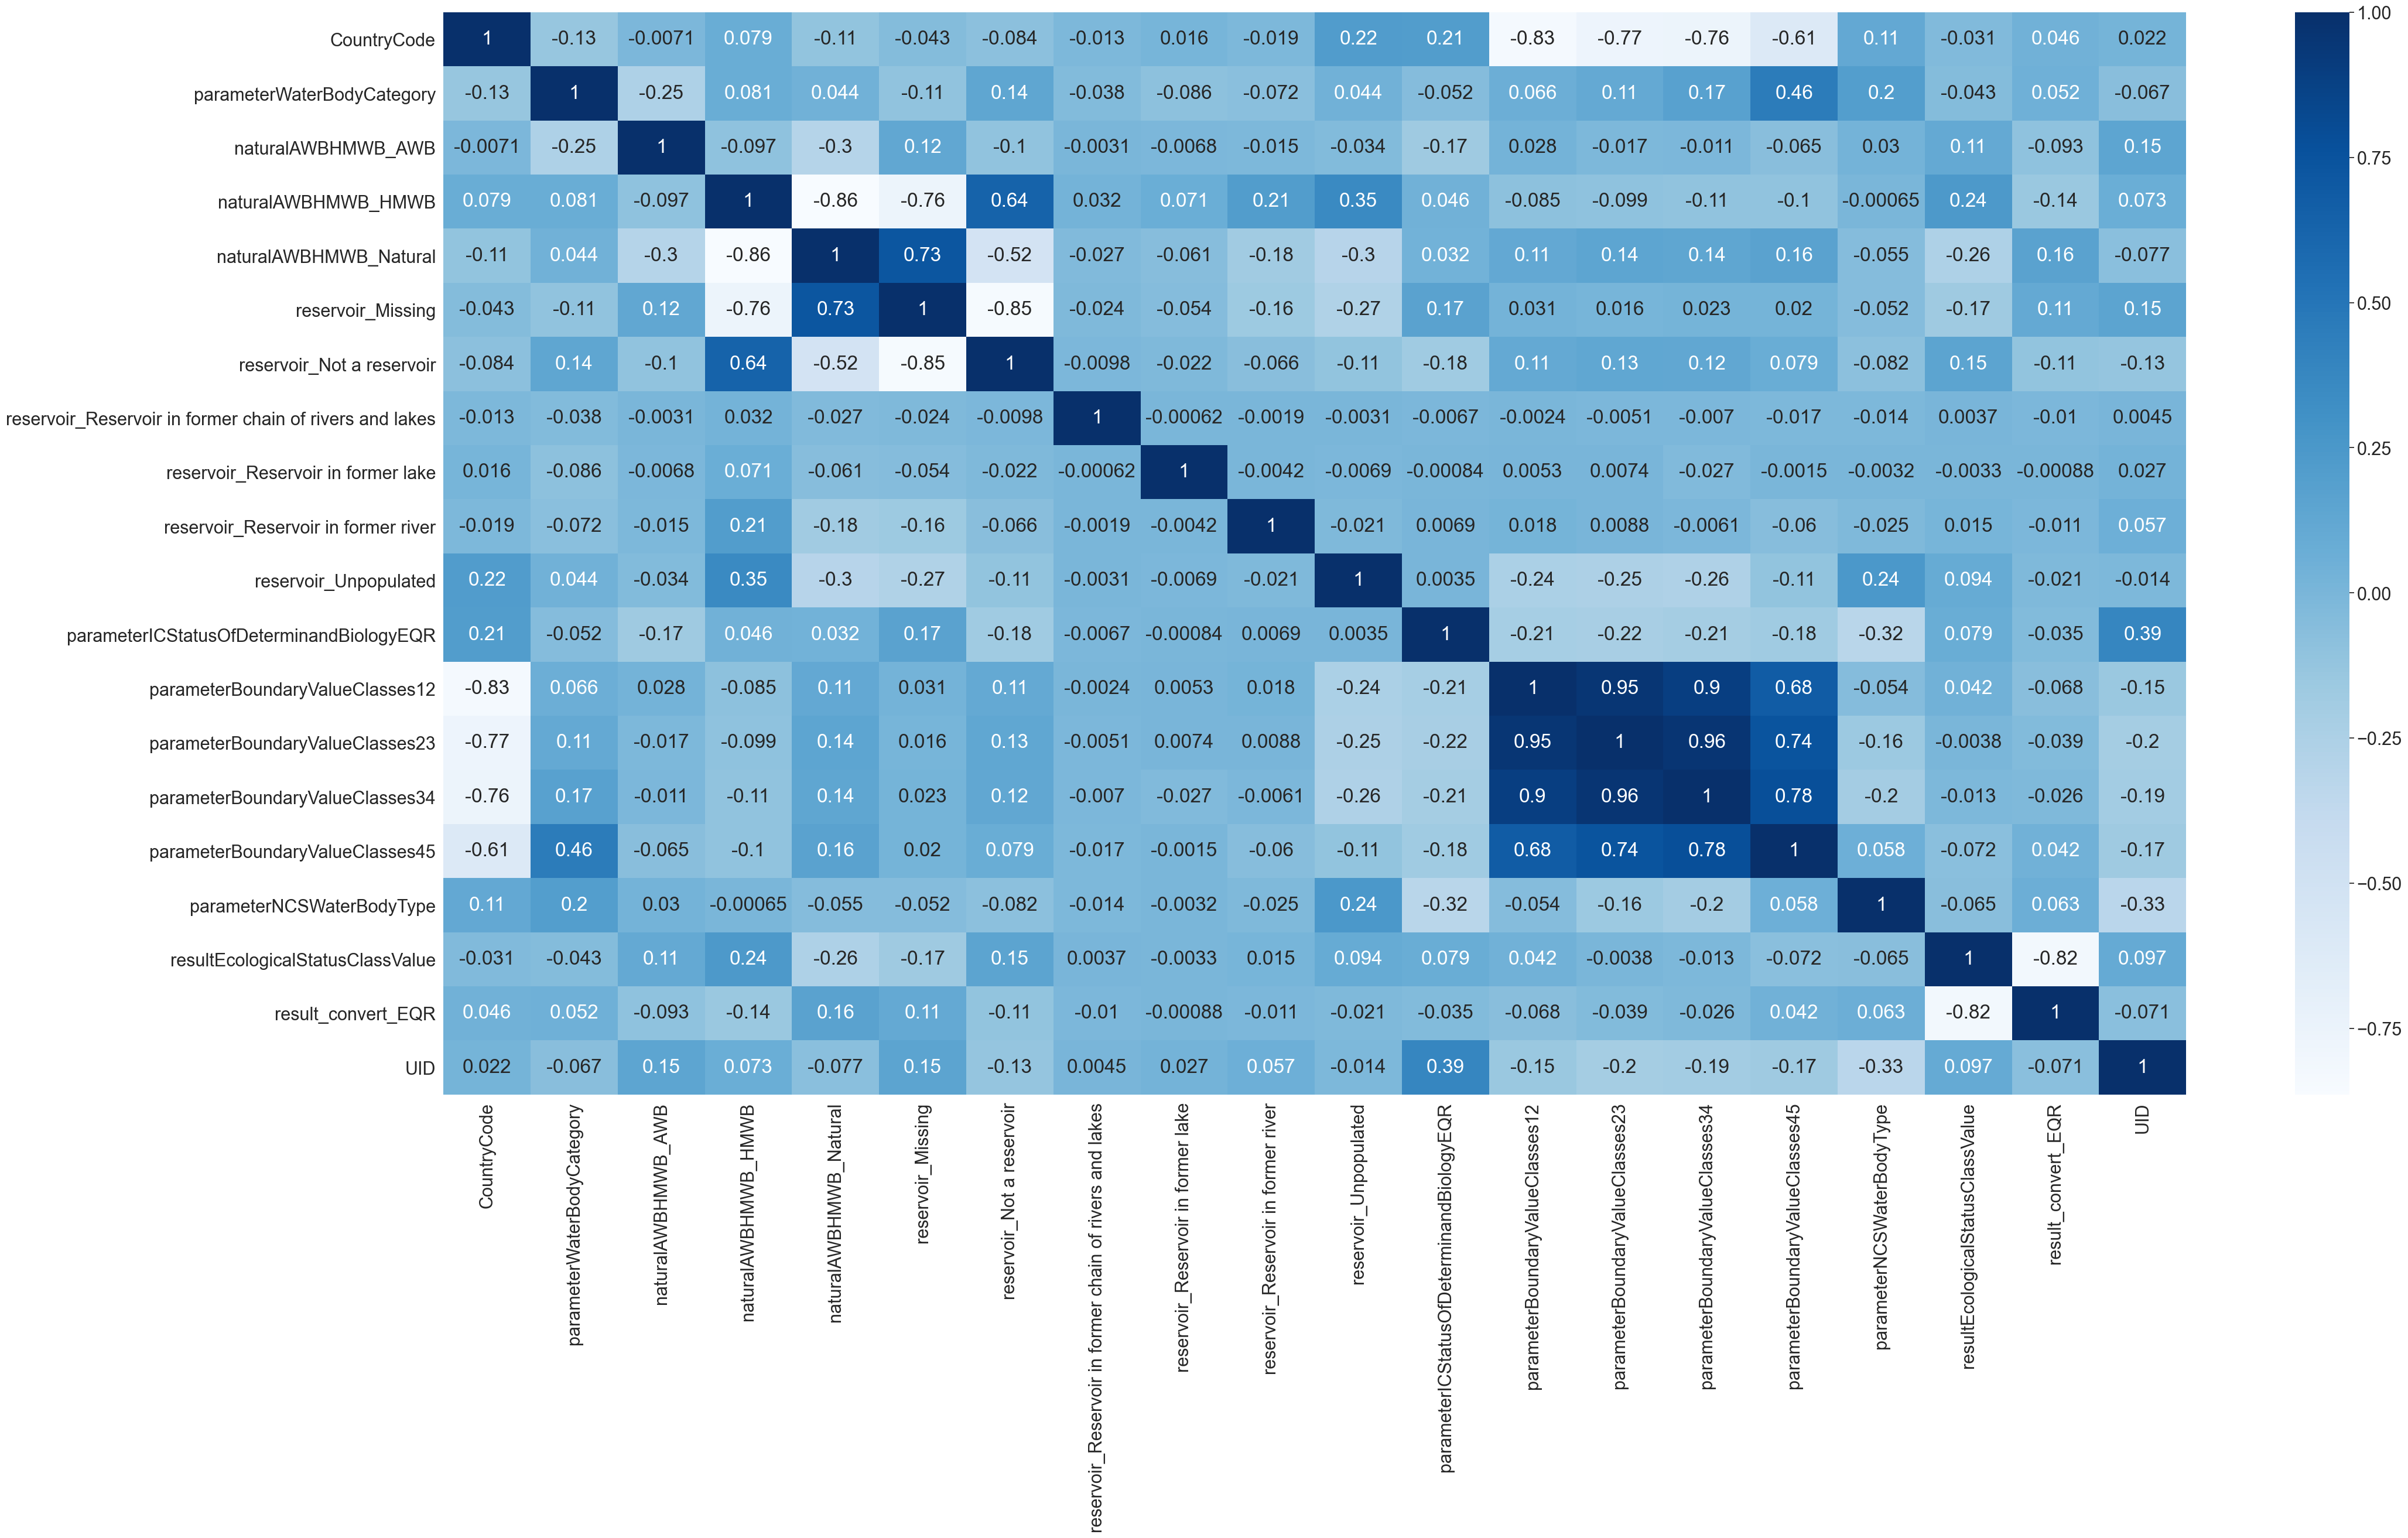

In [5]:
# Check Correlation between each correlation
sns.set(style="white",color_codes=True)            
sns.set(font_scale=2)                              
plt.figure(figsize=(48,24))                       
sns.heatmap(data.corr(),annot=True, cmap="Blues")
plt.show()

2. Split the dataset to 70:30 then test each Naive Bayes method on it

In [6]:
feature_agg = ['CountryCode',
       'parameterWaterBodyCategory', 
       'naturalAWBHMWB_AWB',
       'naturalAWBHMWB_HMWB', 
       'naturalAWBHMWB_Natural', 
       'reservoir_Missing',
       'reservoir_Not a reservoir',
       'reservoir_Reservoir in former chain of rivers and lakes',
       'reservoir_Reservoir in former lake',
       'reservoir_Reservoir in former river', 
       'reservoir_Unpopulated',
       'parameterICStatusOfDeterminandBiologyEQR',
       'parameterBoundaryValueClasses12', 
       'parameterBoundaryValueClasses23',
       'parameterBoundaryValueClasses34', 
       'parameterBoundaryValueClasses45',
       'parameterNCSWaterBodyType',
        ] 

x = data[feature_agg]           # Stored the feature variable in x
y = data['result_convert_EQR']  # Stored the target variable in y
model_num = 0                   # For iteration

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,
                                                 y,
                                                 test_size=0.30, 
                                                 random_state = 654) # 70% for training and 30% for testing

In [7]:
# Naive Bayes model
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test) 

In [8]:
# Naive Bayes Accuracy
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test,y_pred)
print(f"Naive Bayes Accuracy Score: {accuracy}")

Naive Bayes Accuracy Score: 0.651238139319602


In [9]:
# Stored it to DataFrame
model_num +=1 
Model_Scores = pd.DataFrame({"Model Name" : "Gaussian Naive Bayes Classifier",
                             "Split" : "70:30",
                             "Accuracy_score": metrics.accuracy_score(y_test,y_pred),
                             "AUC score" : metrics.roc_auc_score(y_test,y_pred),
                             "Precision score" : metrics.precision_score(y_test,y_pred),
                             "Recall score" : metrics.recall_score(y_test,y_pred),
                             "F1-score": metrics.f1_score(y_test,y_pred)
                             },index=[f"Model {model_num}"])
Model_Scores

,Model Name,Split,Accuracy_score,AUC score,Precision score,Recall score,F1-score
Model 1,Gaussian Naive Bayes Classifier,70:30,0.651238,0.576496,0.699079,0.819324,0.75444


In [10]:
# Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test) 

In [11]:
# Naive Bayes Accuracy
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test,y_pred)
print(f"Naive Bayes Accuracy Score: {accuracy}")

Naive Bayes Accuracy Score: 0.6404767414950243


In [12]:
# Stored it to DataFrame
model_num +=1 
Model_Scores_place_holder = pd.DataFrame({"Model Name" : "Multinomial Naive Bayes Classifier",
                             "Split" : "70:30",
                             "Accuracy_score": metrics.accuracy_score(y_test,y_pred),
                             "AUC score" : metrics.roc_auc_score(y_test,y_pred),
                             "Precision score" : metrics.precision_score(y_test,y_pred),
                             "Recall score" : metrics.recall_score(y_test,y_pred),
                             "F1-score": metrics.f1_score(y_test,y_pred)
                             },index=[f"Model {model_num}"])

Model_Scores = Model_Scores.append(Model_Scores_place_holder)

Model_Scores

,Model Name,Split,Accuracy_score,AUC score,Precision score,Recall score,F1-score
Model 1,Gaussian Naive Bayes Classifier,70:30,0.651238,0.576496,0.699079,0.819324,0.754440
Model 2,Multinomial Naive Bayes Classifier,70:30,0.640477,0.537500,0.673961,0.872058,0.760318


In [13]:
# Naive Bayes model
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test) 

In [14]:
# Naive Bayes Accuracy
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test,y_pred)
print(f"Naive Bayes Accuracy Score: {accuracy}")

Naive Bayes Accuracy Score: 0.6382781763480676


In [15]:
# Stored it to DataFrame
model_num +=1 
Model_Scores_place_holder = pd.DataFrame({"Model Name" : "Bernoulli Naive Bayes Classifier",
                             "Split" : "70:30",
                             "Accuracy_score": metrics.accuracy_score(y_test,y_pred),
                             "AUC score" : metrics.roc_auc_score(y_test,y_pred),
                             "Precision score" : metrics.precision_score(y_test,y_pred),
                             "Recall score" : metrics.recall_score(y_test,y_pred),
                             "F1-score": metrics.f1_score(y_test,y_pred)
                             },index=[f"Model {model_num}"])

Model_Scores = Model_Scores.append(Model_Scores_place_holder)

Model_Scores

,Model Name,Split,Accuracy_score,AUC score,Precision score,Recall score,F1-score
Model 1,Gaussian Naive Bayes Classifier,70:30,0.651238,0.576496,0.699079,0.819324,0.754440
Model 2,Multinomial Naive Bayes Classifier,70:30,0.640477,0.537500,0.673961,0.872058,0.760318
Model 3,Bernoulli Naive Bayes Classifier,70:30,0.638278,0.570363,0.696804,0.791010,0.740925


In [16]:
# Naive Bayes model
from sklearn.naive_bayes import CategoricalNB
clf = CategoricalNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test) 

In [17]:
# Naive Bayes Accuracy
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test,y_pred)
print(f"Naive Bayes Accuracy Score: {accuracy}")

Naive Bayes Accuracy Score: 0.6816709095116871


In [18]:
# Stored it to DataFrame
model_num +=1 
Model_Scores_place_holder = pd.DataFrame({"Model Name" : "Categorical Naive Bayes Classifier",
                             "Split" : "70:30",
                             "Accuracy_score": metrics.accuracy_score(y_test,y_pred),
                             "AUC score" : metrics.roc_auc_score(y_test,y_pred),
                             "Precision score" : metrics.precision_score(y_test,y_pred),
                             "Recall score" : metrics.recall_score(y_test,y_pred),
                             "F1-score": metrics.f1_score(y_test,y_pred)
                             },index=[f"Model {model_num}"])

Model_Scores = Model_Scores.append(Model_Scores_place_holder)

Model_Scores

,Model Name,Split,Accuracy_score,AUC score,Precision score,Recall score,F1-score
Model 1,Gaussian Naive Bayes Classifier,70:30,0.651238,0.576496,0.699079,0.819324,0.754440
Model 2,Multinomial Naive Bayes Classifier,70:30,0.640477,0.537500,0.673961,0.872058,0.760318
Model 3,Bernoulli Naive Bayes Classifier,70:30,0.638278,0.570363,0.696804,0.791010,0.740925
Model 4,Categorical Naive Bayes Classifier,70:30,0.681671,0.630061,0.737083,0.797735,0.766211


In [19]:
# Naive Bayes model
from sklearn.naive_bayes import ComplementNB
clf = ComplementNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test) 

In [20]:
# Naive Bayes Accuracy
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test,y_pred)
print(f"Naive Bayes Accuracy Score: {accuracy}")

Naive Bayes Accuracy Score: 0.5607498264290673


In [21]:
# Stored it to DataFrame
model_num +=1 
Model_Scores_place_holder = pd.DataFrame({"Model Name" : "Complement Naive Bayes Classifier",
                             "Split" : "70:30",
                             "Accuracy_score": metrics.accuracy_score(y_test,y_pred),
                             "AUC score" : metrics.roc_auc_score(y_test,y_pred),
                             "Precision score" : metrics.precision_score(y_test,y_pred),
                             "Recall score" : metrics.recall_score(y_test,y_pred),
                             "F1-score": metrics.f1_score(y_test,y_pred)
                             },index=[f"Model {model_num}"])

Model_Scores = Model_Scores.append(Model_Scores_place_holder)

Model_Scores

,Model Name,Split,Accuracy_score,AUC score,Precision score,Recall score,F1-score
Model 1,Gaussian Naive Bayes Classifier,70:30,0.651238,0.576496,0.699079,0.819324,0.754440
Model 2,Multinomial Naive Bayes Classifier,70:30,0.640477,0.537500,0.673961,0.872058,0.760318
Model 3,Bernoulli Naive Bayes Classifier,70:30,0.638278,0.570363,0.696804,0.791010,0.740925
Model 4,Categorical Naive Bayes Classifier,70:30,0.681671,0.630061,0.737083,0.797735,0.766211
Model 5,Complement Naive Bayes Classifier,70:30,0.560750,0.581193,0.734040,0.514776,0.605159


3. Split the dataset to 75:25 then test each Naive Bayes method on it

In [22]:
feature_agg = ['CountryCode',
       'parameterWaterBodyCategory', 
       'naturalAWBHMWB_AWB',
       'naturalAWBHMWB_HMWB', 
       'naturalAWBHMWB_Natural', 
       'reservoir_Missing',
       'reservoir_Not a reservoir',
       'reservoir_Reservoir in former chain of rivers and lakes',
       'reservoir_Reservoir in former lake',
       'reservoir_Reservoir in former river', 
       'reservoir_Unpopulated',
       'parameterICStatusOfDeterminandBiologyEQR',
       'parameterBoundaryValueClasses12', 
       'parameterBoundaryValueClasses23',
       'parameterBoundaryValueClasses34', 
       'parameterBoundaryValueClasses45',
       'parameterNCSWaterBodyType',
        ] 

x = data[feature_agg]           # Stored the feature variable in x
y = data['result_convert_EQR']  # Stored the target variable in y

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,
                                                 y,
                                                 test_size=0.25, 
                                                 random_state = 654) # 70% for training and 30% for testing

In [23]:
# Naive Bayes model
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test) 

In [24]:
# Naive Bayes Accuracy
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test,y_pred)
print(f"Naive Bayes Accuracy Score: {accuracy}")

Naive Bayes Accuracy Score: 0.6562066092752014


In [25]:
# Stored it to DataFrame
model_num +=1 
Model_Scores_place_holder = pd.DataFrame({"Model Name" : "Gaussian Naive Bayes Classifier",
                             "Split" : "75:25",
                             "Accuracy_score": metrics.accuracy_score(y_test,y_pred),
                             "AUC score" : metrics.roc_auc_score(y_test,y_pred),
                             "Precision score" : metrics.precision_score(y_test,y_pred),
                             "Recall score" : metrics.recall_score(y_test,y_pred),
                             "F1-score": metrics.f1_score(y_test,y_pred)
                             },index=[f"Model {model_num}"])

Model_Scores = Model_Scores.append(Model_Scores_place_holder)

Model_Scores

,Model Name,Split,Accuracy_score,AUC score,Precision score,Recall score,F1-score
Model 1,Gaussian Naive Bayes Classifier,70:30,0.651238,0.576496,0.699079,0.819324,0.754440
Model 2,Multinomial Naive Bayes Classifier,70:30,0.640477,0.537500,0.673961,0.872058,0.760318
Model 3,Bernoulli Naive Bayes Classifier,70:30,0.638278,0.570363,0.696804,0.791010,0.740925
Model 4,Categorical Naive Bayes Classifier,70:30,0.681671,0.630061,0.737083,0.797735,0.766211
Model 5,Complement Naive Bayes Classifier,70:30,0.560750,0.581193,0.734040,0.514776,0.605159
Model 6,Gaussian Naive Bayes Classifier,75:25,0.656207,0.579778,0.703831,0.823119,0.758816


In [26]:
# Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test) 

In [27]:
# Naive Bayes Accuracy
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test,y_pred)
print(f"Naive Bayes Accuracy Score: {accuracy}")

Naive Bayes Accuracy Score: 0.645931685642877


In [28]:
# Stored it to DataFrame
model_num +=1 
Model_Scores_place_holder = pd.DataFrame({"Model Name" : "Multinomial Naive Bayes Classifier",
                             "Split" : "75:25",
                             "Accuracy_score": metrics.accuracy_score(y_test,y_pred),
                             "AUC score" : metrics.roc_auc_score(y_test,y_pred),
                             "Precision score" : metrics.precision_score(y_test,y_pred),
                             "Recall score" : metrics.recall_score(y_test,y_pred),
                             "F1-score": metrics.f1_score(y_test,y_pred)
                             },index=[f"Model {model_num}"])

Model_Scores = Model_Scores.append(Model_Scores_place_holder)

Model_Scores

,Model Name,Split,Accuracy_score,AUC score,Precision score,Recall score,F1-score
Model 1,Gaussian Naive Bayes Classifier,70:30,0.651238,0.576496,0.699079,0.819324,0.754440
Model 2,Multinomial Naive Bayes Classifier,70:30,0.640477,0.537500,0.673961,0.872058,0.760318
Model 3,Bernoulli Naive Bayes Classifier,70:30,0.638278,0.570363,0.696804,0.791010,0.740925
Model 4,Categorical Naive Bayes Classifier,70:30,0.681671,0.630061,0.737083,0.797735,0.766211
Model 5,Complement Naive Bayes Classifier,70:30,0.560750,0.581193,0.734040,0.514776,0.605159
Model 6,Gaussian Naive Bayes Classifier,75:25,0.656207,0.579778,0.703831,0.823119,0.758816
Model 7,Multinomial Naive Bayes Classifier,75:25,0.645932,0.539930,0.678210,0.877430,0.765064


In [29]:
# Naive Bayes model
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test) 

In [30]:
# Naive Bayes Accuracy
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test,y_pred)
print(f"Naive Bayes Accuracy Score: {accuracy}")

Naive Bayes Accuracy Score: 0.6437100805331852


In [31]:
# Stored it to DataFrame
model_num +=1 
Model_Scores_place_holder = pd.DataFrame({"Model Name" : "Bernoulli Naive Bayes Classifier",
                             "Split" : "75:25",
                             "Accuracy_score": metrics.accuracy_score(y_test,y_pred),
                             "AUC score" : metrics.roc_auc_score(y_test,y_pred),
                             "Precision score" : metrics.precision_score(y_test,y_pred),
                             "Recall score" : metrics.recall_score(y_test,y_pred),
                             "F1-score": metrics.f1_score(y_test,y_pred)
                             },index=[f"Model {model_num}"])

Model_Scores = Model_Scores.append(Model_Scores_place_holder)

Model_Scores

,Model Name,Split,Accuracy_score,AUC score,Precision score,Recall score,F1-score
Model 1,Gaussian Naive Bayes Classifier,70:30,0.651238,0.576496,0.699079,0.819324,0.754440
Model 2,Multinomial Naive Bayes Classifier,70:30,0.640477,0.537500,0.673961,0.872058,0.760318
Model 3,Bernoulli Naive Bayes Classifier,70:30,0.638278,0.570363,0.696804,0.791010,0.740925
Model 4,Categorical Naive Bayes Classifier,70:30,0.681671,0.630061,0.737083,0.797735,0.766211
Model 5,Complement Naive Bayes Classifier,70:30,0.560750,0.581193,0.734040,0.514776,0.605159
Model 6,Gaussian Naive Bayes Classifier,75:25,0.656207,0.579778,0.703831,0.823119,0.758816
Model 7,Multinomial Naive Bayes Classifier,75:25,0.645932,0.539930,0.678210,0.877430,0.765064
Model 8,Bernoulli Naive Bayes Classifier,75:25,0.643710,0.574236,0.701977,0.795435,0.745790


In [32]:
# Naive Bayes model
from sklearn.naive_bayes import CategoricalNB
clf = CategoricalNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test) 

In [33]:
# Naive Bayes Accuracy
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test,y_pred)
print(f"Naive Bayes Accuracy Score: {accuracy}")

Naive Bayes Accuracy Score: 0.6866148292141072


In [34]:
# Stored it to DataFrame
model_num +=1 
Model_Scores_place_holder = pd.DataFrame({"Model Name" : "Categorical Naive Bayes Classifier",
                             "Split" : "75:25",
                             "Accuracy_score": metrics.accuracy_score(y_test,y_pred),
                             "AUC score" : metrics.roc_auc_score(y_test,y_pred),
                             "Precision score" : metrics.precision_score(y_test,y_pred),
                             "Recall score" : metrics.recall_score(y_test,y_pred),
                             "F1-score": metrics.f1_score(y_test,y_pred)
                             },index=[f"Model {model_num}"])

Model_Scores = Model_Scores.append(Model_Scores_place_holder)

Model_Scores

,Model Name,Split,Accuracy_score,AUC score,Precision score,Recall score,F1-score
Model 1,Gaussian Naive Bayes Classifier,70:30,0.651238,0.576496,0.699079,0.819324,0.754440
Model 2,Multinomial Naive Bayes Classifier,70:30,0.640477,0.537500,0.673961,0.872058,0.760318
Model 3,Bernoulli Naive Bayes Classifier,70:30,0.638278,0.570363,0.696804,0.791010,0.740925
Model 4,Categorical Naive Bayes Classifier,70:30,0.681671,0.630061,0.737083,0.797735,0.766211
Model 5,Complement Naive Bayes Classifier,70:30,0.560750,0.581193,0.734040,0.514776,0.605159
Model 6,Gaussian Naive Bayes Classifier,75:25,0.656207,0.579778,0.703831,0.823119,0.758816
Model 7,Multinomial Naive Bayes Classifier,75:25,0.645932,0.539930,0.678210,0.877430,0.765064
Model 8,Bernoulli Naive Bayes Classifier,75:25,0.643710,0.574236,0.701977,0.795435,0.745790
Model 9,Categorical Naive Bayes Classifier,75:25,0.686615,0.633980,0.742125,0.801564,0.770700


In [35]:
# Naive Bayes model
from sklearn.naive_bayes import ComplementNB
clf = ComplementNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test) 

In [36]:
# Naive Bayes Accuracy
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test,y_pred)
print(f"Naive Bayes Accuracy Score: {accuracy}")

Naive Bayes Accuracy Score: 0.5723410163843377


In [37]:
# Stored it to DataFrame
model_num +=1 
Model_Scores_place_holder = pd.DataFrame({"Model Name" : "Complement Naive Bayes Classifier",
                             "Split" : "75:25",
                             "Accuracy_score": metrics.accuracy_score(y_test,y_pred),
                             "AUC score" : metrics.roc_auc_score(y_test,y_pred),
                             "Precision score" : metrics.precision_score(y_test,y_pred),
                             "Recall score" : metrics.recall_score(y_test,y_pred),
                             "F1-score": metrics.f1_score(y_test,y_pred)
                             },index=[f"Model {model_num}"])

Model_Scores = Model_Scores.append(Model_Scores_place_holder)

Model_Scores

,Model Name,Split,Accuracy_score,AUC score,Precision score,Recall score,F1-score
Model 1,Gaussian Naive Bayes Classifier,70:30,0.651238,0.576496,0.699079,0.819324,0.754440
Model 2,Multinomial Naive Bayes Classifier,70:30,0.640477,0.537500,0.673961,0.872058,0.760318
Model 3,Bernoulli Naive Bayes Classifier,70:30,0.638278,0.570363,0.696804,0.791010,0.740925
Model 4,Categorical Naive Bayes Classifier,70:30,0.681671,0.630061,0.737083,0.797735,0.766211
Model 5,Complement Naive Bayes Classifier,70:30,0.560750,0.581193,0.734040,0.514776,0.605159
Model 6,Gaussian Naive Bayes Classifier,75:25,0.656207,0.579778,0.703831,0.823119,0.758816
Model 7,Multinomial Naive Bayes Classifier,75:25,0.645932,0.539930,0.678210,0.877430,0.765064
Model 8,Bernoulli Naive Bayes Classifier,75:25,0.643710,0.574236,0.701977,0.795435,0.745790
Model 9,Categorical Naive Bayes Classifier,75:25,0.686615,0.633980,0.742125,0.801564,0.770700
Model 10,Complement Naive Bayes Classifier,75:25,0.572341,0.594241,0.749396,0.524514,0.617106


In [38]:
feature_agg = ['CountryCode',
       'parameterWaterBodyCategory', 
       'naturalAWBHMWB_AWB',
       'naturalAWBHMWB_HMWB', 
       'naturalAWBHMWB_Natural', 
       'reservoir_Missing',
       'reservoir_Not a reservoir',
       'reservoir_Reservoir in former chain of rivers and lakes',
       'reservoir_Reservoir in former lake',
       'reservoir_Reservoir in former river', 
       'reservoir_Unpopulated',
       'parameterICStatusOfDeterminandBiologyEQR',
       'parameterBoundaryValueClasses12', 
       'parameterBoundaryValueClasses23',
       'parameterBoundaryValueClasses34', 
       'parameterBoundaryValueClasses45',
       'parameterNCSWaterBodyType',
        ] 

x = data[feature_agg]           # Stored the feature variable in x
y = data['result_convert_EQR']  # Stored the target variable in y

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,
                                                 y,
                                                 test_size=0.2, 
                                                 random_state = 654) # 70% for training and 30% for testing

In [39]:
# Naive Bayes model
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test) 

In [40]:
# Naive Bayes Accuracy
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test,y_pred)
print(f"Naive Bayes Accuracy Score: {accuracy}")

Naive Bayes Accuracy Score: 0.6545738587050859


In [41]:
# Stored it to DataFrame
model_num +=1 
Model_Scores_place_holder = pd.DataFrame({"Model Name" : "Gaussian Naive Bayes Classifier",
                             "Split" : "80:20",
                             "Accuracy_score": metrics.accuracy_score(y_test,y_pred),
                             "AUC score" : metrics.roc_auc_score(y_test,y_pred),
                             "Precision score" : metrics.precision_score(y_test,y_pred),
                             "Recall score" : metrics.recall_score(y_test,y_pred),
                             "F1-score": metrics.f1_score(y_test,y_pred)
                             },index=[f"Model {model_num}"])

Model_Scores = Model_Scores.append(Model_Scores_place_holder)

Model_Scores

,Model Name,Split,Accuracy_score,AUC score,Precision score,Recall score,F1-score
Model 1,Gaussian Naive Bayes Classifier,70:30,0.651238,0.576496,0.699079,0.819324,0.754440
Model 2,Multinomial Naive Bayes Classifier,70:30,0.640477,0.537500,0.673961,0.872058,0.760318
Model 3,Bernoulli Naive Bayes Classifier,70:30,0.638278,0.570363,0.696804,0.791010,0.740925
Model 4,Categorical Naive Bayes Classifier,70:30,0.681671,0.630061,0.737083,0.797735,0.766211
Model 5,Complement Naive Bayes Classifier,70:30,0.560750,0.581193,0.734040,0.514776,0.605159
Model 6,Gaussian Naive Bayes Classifier,75:25,0.656207,0.579778,0.703831,0.823119,0.758816
Model 7,Multinomial Naive Bayes Classifier,75:25,0.645932,0.539930,0.678210,0.877430,0.765064
Model 8,Bernoulli Naive Bayes Classifier,75:25,0.643710,0.574236,0.701977,0.795435,0.745790
Model 9,Categorical Naive Bayes Classifier,75:25,0.686615,0.633980,0.742125,0.801564,0.770700
Model 10,Complement Naive Bayes Classifier,75:25,0.572341,0.594241,0.749396,0.524514,0.617106


In [42]:
# Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test) 

In [43]:
# Naive Bayes Accuracy
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test,y_pred)
print(f"Naive Bayes Accuracy Score: {accuracy}")

Naive Bayes Accuracy Score: 0.6406873806630793


In [44]:
# Stored it to DataFrame
model_num +=1 
Model_Scores_place_holder = pd.DataFrame({"Model Name" : "Multinomial Naive Bayes Classifier",
                             "Split" : "80:20",
                             "Accuracy_score": metrics.accuracy_score(y_test,y_pred),
                             "AUC score" : metrics.roc_auc_score(y_test,y_pred),
                             "Precision score" : metrics.precision_score(y_test,y_pred),
                             "Recall score" : metrics.recall_score(y_test,y_pred),
                             "F1-score": metrics.f1_score(y_test,y_pred)
                             },index=[f"Model {model_num}"])

Model_Scores = Model_Scores.append(Model_Scores_place_holder)

Model_Scores

,Model Name,Split,Accuracy_score,AUC score,Precision score,Recall score,F1-score
Model 1,Gaussian Naive Bayes Classifier,70:30,0.651238,0.576496,0.699079,0.819324,0.754440
Model 2,Multinomial Naive Bayes Classifier,70:30,0.640477,0.537500,0.673961,0.872058,0.760318
Model 3,Bernoulli Naive Bayes Classifier,70:30,0.638278,0.570363,0.696804,0.791010,0.740925
Model 4,Categorical Naive Bayes Classifier,70:30,0.681671,0.630061,0.737083,0.797735,0.766211
Model 5,Complement Naive Bayes Classifier,70:30,0.560750,0.581193,0.734040,0.514776,0.605159
Model 6,Gaussian Naive Bayes Classifier,75:25,0.656207,0.579778,0.703831,0.823119,0.758816
Model 7,Multinomial Naive Bayes Classifier,75:25,0.645932,0.539930,0.678210,0.877430,0.765064
Model 8,Bernoulli Naive Bayes Classifier,75:25,0.643710,0.574236,0.701977,0.795435,0.745790
Model 9,Categorical Naive Bayes Classifier,75:25,0.686615,0.633980,0.742125,0.801564,0.770700
Model 10,Complement Naive Bayes Classifier,75:25,0.572341,0.594241,0.749396,0.524514,0.617106


In [45]:
# Naive Bayes model
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test) 

In [46]:
# Naive Bayes Accuracy
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test,y_pred)
print(f"Naive Bayes Accuracy Score: {accuracy}")

Naive Bayes Accuracy Score: 0.6422496094428051


In [47]:
# Stored it to DataFrame
model_num +=1 
Model_Scores_place_holder = pd.DataFrame({"Model Name" : "Bernoulli Naive Bayes Classifier",
                             "Split" : "80:20",
                             "Accuracy_score": metrics.accuracy_score(y_test,y_pred),
                             "AUC score" : metrics.roc_auc_score(y_test,y_pred),
                             "Precision score" : metrics.precision_score(y_test,y_pred),
                             "Recall score" : metrics.recall_score(y_test,y_pred),
                             "F1-score": metrics.f1_score(y_test,y_pred)
                             },index=[f"Model {model_num}"])

Model_Scores = Model_Scores.append(Model_Scores_place_holder)

Model_Scores

,Model Name,Split,Accuracy_score,AUC score,Precision score,Recall score,F1-score
Model 1,Gaussian Naive Bayes Classifier,70:30,0.651238,0.576496,0.699079,0.819324,0.754440
Model 2,Multinomial Naive Bayes Classifier,70:30,0.640477,0.537500,0.673961,0.872058,0.760318
Model 3,Bernoulli Naive Bayes Classifier,70:30,0.638278,0.570363,0.696804,0.791010,0.740925
Model 4,Categorical Naive Bayes Classifier,70:30,0.681671,0.630061,0.737083,0.797735,0.766211
Model 5,Complement Naive Bayes Classifier,70:30,0.560750,0.581193,0.734040,0.514776,0.605159
Model 6,Gaussian Naive Bayes Classifier,75:25,0.656207,0.579778,0.703831,0.823119,0.758816
Model 7,Multinomial Naive Bayes Classifier,75:25,0.645932,0.539930,0.678210,0.877430,0.765064
Model 8,Bernoulli Naive Bayes Classifier,75:25,0.643710,0.574236,0.701977,0.795435,0.745790
Model 9,Categorical Naive Bayes Classifier,75:25,0.686615,0.633980,0.742125,0.801564,0.770700
Model 10,Complement Naive Bayes Classifier,75:25,0.572341,0.594241,0.749396,0.524514,0.617106


In [48]:
# Naive Bayes model
from sklearn.naive_bayes import CategoricalNB
clf = CategoricalNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test) 

In [49]:
# Naive Bayes Accuracy
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test,y_pred)
print(f"Naive Bayes Accuracy Score: {accuracy}")

Naive Bayes Accuracy Score: 0.6938031591737546


In [50]:
# Stored it to DataFrame
model_num +=1 
Model_Scores_place_holder = pd.DataFrame({"Model Name" : "Categorical Naive Bayes Classifier",
                             "Split" : "80:20",
                             "Accuracy_score": metrics.accuracy_score(y_test,y_pred),
                             "AUC score" : metrics.roc_auc_score(y_test,y_pred),
                             "Precision score" : metrics.precision_score(y_test,y_pred),
                             "Recall score" : metrics.recall_score(y_test,y_pred),
                             "F1-score": metrics.f1_score(y_test,y_pred)
                             },index=[f"Model {model_num}"])

Model_Scores = Model_Scores.append(Model_Scores_place_holder)

Model_Scores

,Model Name,Split,Accuracy_score,AUC score,Precision score,Recall score,F1-score
Model 1,Gaussian Naive Bayes Classifier,70:30,0.651238,0.576496,0.699079,0.819324,0.754440
Model 2,Multinomial Naive Bayes Classifier,70:30,0.640477,0.537500,0.673961,0.872058,0.760318
Model 3,Bernoulli Naive Bayes Classifier,70:30,0.638278,0.570363,0.696804,0.791010,0.740925
Model 4,Categorical Naive Bayes Classifier,70:30,0.681671,0.630061,0.737083,0.797735,0.766211
Model 5,Complement Naive Bayes Classifier,70:30,0.560750,0.581193,0.734040,0.514776,0.605159
Model 6,Gaussian Naive Bayes Classifier,75:25,0.656207,0.579778,0.703831,0.823119,0.758816
Model 7,Multinomial Naive Bayes Classifier,75:25,0.645932,0.539930,0.678210,0.877430,0.765064
Model 8,Bernoulli Naive Bayes Classifier,75:25,0.643710,0.574236,0.701977,0.795435,0.745790
Model 9,Categorical Naive Bayes Classifier,75:25,0.686615,0.633980,0.742125,0.801564,0.770700
Model 10,Complement Naive Bayes Classifier,75:25,0.572341,0.594241,0.749396,0.524514,0.617106


In [51]:
# Naive Bayes model
from sklearn.naive_bayes import ComplementNB
clf = ComplementNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test) 

In [52]:
# Naive Bayes Accuracy
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test,y_pred)
print(f"Naive Bayes Accuracy Score: {accuracy}")

Naive Bayes Accuracy Score: 0.5691720187467454


In [53]:
# Stored it to DataFrame
model_num +=1 
Model_Scores_place_holder = pd.DataFrame({"Model Name" : "Complement Naive Bayes Classifier",
                             "Split" : "80:20",
                             "Accuracy_score": metrics.accuracy_score(y_test,y_pred),
                             "AUC score" : metrics.roc_auc_score(y_test,y_pred),
                             "Precision score" : metrics.precision_score(y_test,y_pred),
                             "Recall score" : metrics.recall_score(y_test,y_pred),
                             "F1-score": metrics.f1_score(y_test,y_pred)
                             },index=[f"Model {model_num}"])

Model_Scores = Model_Scores.append(Model_Scores_place_holder)

Model_Scores

,Model Name,Split,Accuracy_score,AUC score,Precision score,Recall score,F1-score
Model 1,Gaussian Naive Bayes Classifier,70:30,0.651238,0.576496,0.699079,0.819324,0.754440
Model 2,Multinomial Naive Bayes Classifier,70:30,0.640477,0.537500,0.673961,0.872058,0.760318
Model 3,Bernoulli Naive Bayes Classifier,70:30,0.638278,0.570363,0.696804,0.791010,0.740925
Model 4,Categorical Naive Bayes Classifier,70:30,0.681671,0.630061,0.737083,0.797735,0.766211
Model 5,Complement Naive Bayes Classifier,70:30,0.560750,0.581193,0.734040,0.514776,0.605159
Model 6,Gaussian Naive Bayes Classifier,75:25,0.656207,0.579778,0.703831,0.823119,0.758816
Model 7,Multinomial Naive Bayes Classifier,75:25,0.645932,0.539930,0.678210,0.877430,0.765064
Model 8,Bernoulli Naive Bayes Classifier,75:25,0.643710,0.574236,0.701977,0.795435,0.745790
Model 9,Categorical Naive Bayes Classifier,75:25,0.686615,0.633980,0.742125,0.801564,0.770700
Model 10,Complement Naive Bayes Classifier,75:25,0.572341,0.594241,0.749396,0.524514,0.617106


Graphs

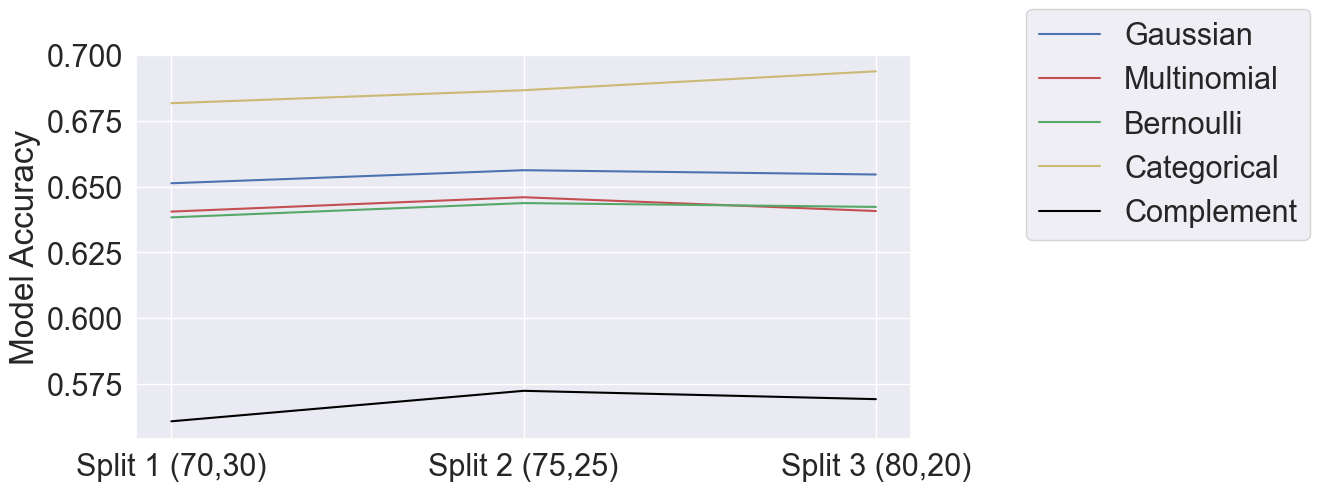

In [54]:
plt.figure(figsize=(10,5))
plt.ylabel('Model Accuracy')

Model_Scores_Gau = Model_Scores[Model_Scores["Model Name"] == "Gaussian Naive Bayes Classifier"]["Accuracy_score"]
Model_Scores_Mul = Model_Scores[Model_Scores["Model Name"] == "Multinomial Naive Bayes Classifier"]["Accuracy_score"]
Model_Scores_Ber = Model_Scores[Model_Scores["Model Name"] == "Bernoulli Naive Bayes Classifier"]["Accuracy_score"]
Model_Scores_Cat = Model_Scores[Model_Scores["Model Name"] == "Categorical Naive Bayes Classifier"]["Accuracy_score"]
Model_Scores_Com = Model_Scores[Model_Scores["Model Name"] == "Complement Naive Bayes Classifier"]["Accuracy_score"]


plt.plot([1,2,3], Model_Scores_Gau, color = 'b', label = 'Gaussian')
plt.plot([1,2,3], Model_Scores_Mul, color = 'r', label = 'Multinomial')
plt.plot([1,2,3], Model_Scores_Ber, color = 'g', label = 'Bernoulli')
plt.plot([1,2,3], Model_Scores_Cat, color = 'y', label = 'Categorical')
plt.plot([1,2,3], Model_Scores_Com, color = 'black', label = 'Complement')
plt.xticks([1,2,3],["Split 1 (70,30)", "Split 2 (75,25)","Split 3 (80,20)"])
plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)
plt.show()

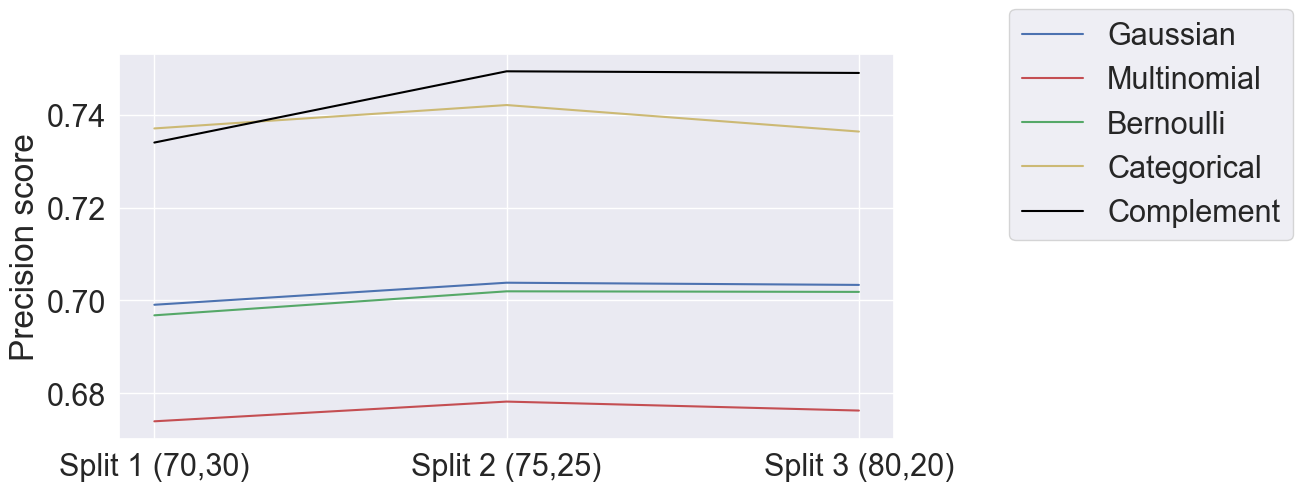

In [58]:
plt.figure(figsize=(10,5))
plt.ylabel('Precision score')

Model_Scores_Gau = Model_Scores[Model_Scores["Model Name"] == "Gaussian Naive Bayes Classifier"]["Precision score"]
Model_Scores_Mul = Model_Scores[Model_Scores["Model Name"] == "Multinomial Naive Bayes Classifier"]["Precision score"]
Model_Scores_Ber = Model_Scores[Model_Scores["Model Name"] == "Bernoulli Naive Bayes Classifier"]["Precision score"]
Model_Scores_Cat = Model_Scores[Model_Scores["Model Name"] == "Categorical Naive Bayes Classifier"]["Precision score"]
Model_Scores_Com = Model_Scores[Model_Scores["Model Name"] == "Complement Naive Bayes Classifier"]["Precision score"]


plt.plot([1,2,3], Model_Scores_Gau, color = 'b', label = 'Gaussian')
plt.plot([1,2,3], Model_Scores_Mul, color = 'r', label = 'Multinomial')
plt.plot([1,2,3], Model_Scores_Ber, color = 'g', label = 'Bernoulli')
plt.plot([1,2,3], Model_Scores_Cat, color = 'y', label = 'Categorical')
plt.plot([1,2,3], Model_Scores_Com, color = 'black', label = 'Complement')
plt.xticks([1,2,3],["Split 1 (70,30)", "Split 2 (75,25)","Split 3 (80,20)"])
plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)
plt.show()

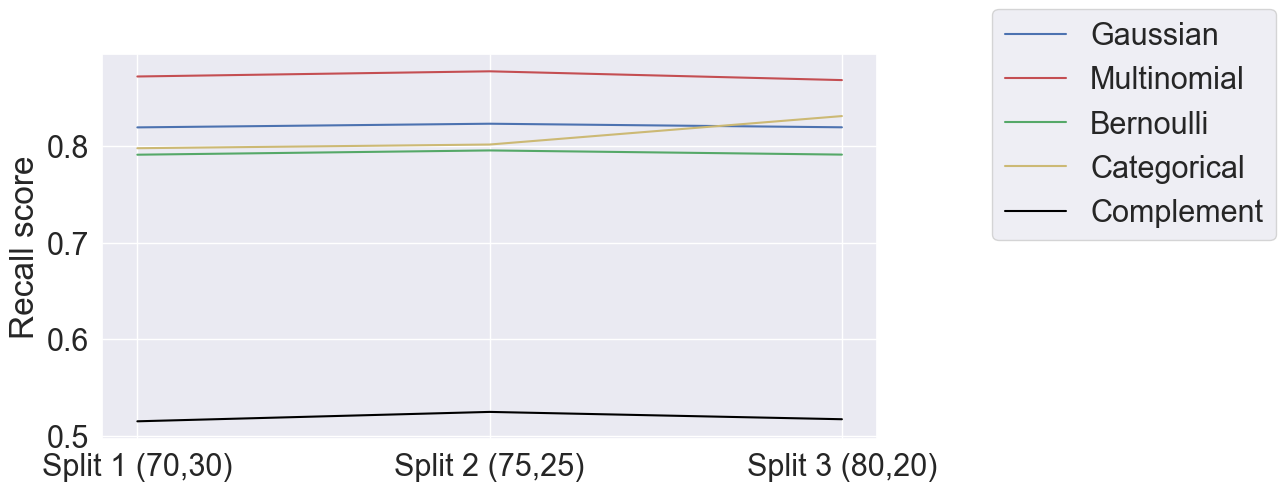

In [59]:
plt.figure(figsize=(10,5))
plt.ylabel('Recall score')

Model_Scores_Gau = Model_Scores[Model_Scores["Model Name"] == "Gaussian Naive Bayes Classifier"]["Recall score"]
Model_Scores_Mul = Model_Scores[Model_Scores["Model Name"] == "Multinomial Naive Bayes Classifier"]["Recall score"]
Model_Scores_Ber = Model_Scores[Model_Scores["Model Name"] == "Bernoulli Naive Bayes Classifier"]["Recall score"]
Model_Scores_Cat = Model_Scores[Model_Scores["Model Name"] == "Categorical Naive Bayes Classifier"]["Recall score"]
Model_Scores_Com = Model_Scores[Model_Scores["Model Name"] == "Complement Naive Bayes Classifier"]["Recall score"]


plt.plot([1,2,3], Model_Scores_Gau, color = 'b', label = 'Gaussian')
plt.plot([1,2,3], Model_Scores_Mul, color = 'r', label = 'Multinomial')
plt.plot([1,2,3], Model_Scores_Ber, color = 'g', label = 'Bernoulli')
plt.plot([1,2,3], Model_Scores_Cat, color = 'y', label = 'Categorical')
plt.plot([1,2,3], Model_Scores_Com, color = 'black', label = 'Complement')
plt.xticks([1,2,3],["Split 1 (70,30)", "Split 2 (75,25)","Split 3 (80,20)"])
plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)
plt.show()

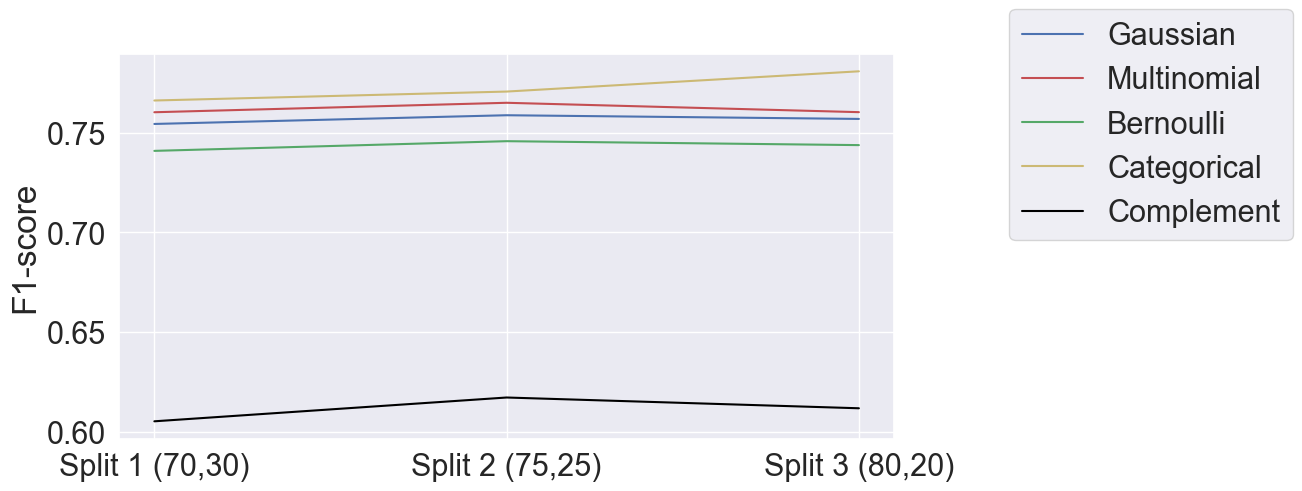

In [55]:
plt.figure(figsize=(10,5))
plt.ylabel('F1-score')

Model_Scores_Gau = Model_Scores[Model_Scores["Model Name"] == "Gaussian Naive Bayes Classifier"]["F1-score"]
Model_Scores_Mul = Model_Scores[Model_Scores["Model Name"] == "Multinomial Naive Bayes Classifier"]["F1-score"]
Model_Scores_Ber = Model_Scores[Model_Scores["Model Name"] == "Bernoulli Naive Bayes Classifier"]["F1-score"]
Model_Scores_Cat = Model_Scores[Model_Scores["Model Name"] == "Categorical Naive Bayes Classifier"]["F1-score"]
Model_Scores_Com = Model_Scores[Model_Scores["Model Name"] == "Complement Naive Bayes Classifier"]["F1-score"]


plt.plot([1,2,3], Model_Scores_Gau, color = 'b', label = 'Gaussian')
plt.plot([1,2,3], Model_Scores_Mul, color = 'r', label = 'Multinomial')
plt.plot([1,2,3], Model_Scores_Ber, color = 'g', label = 'Bernoulli')
plt.plot([1,2,3], Model_Scores_Cat, color = 'y', label = 'Categorical')
plt.plot([1,2,3], Model_Scores_Com, color = 'black', label = 'Complement')
plt.xticks([1,2,3],["Split 1 (70,30)", "Split 2 (75,25)","Split 3 (80,20)"])
plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)
plt.show()

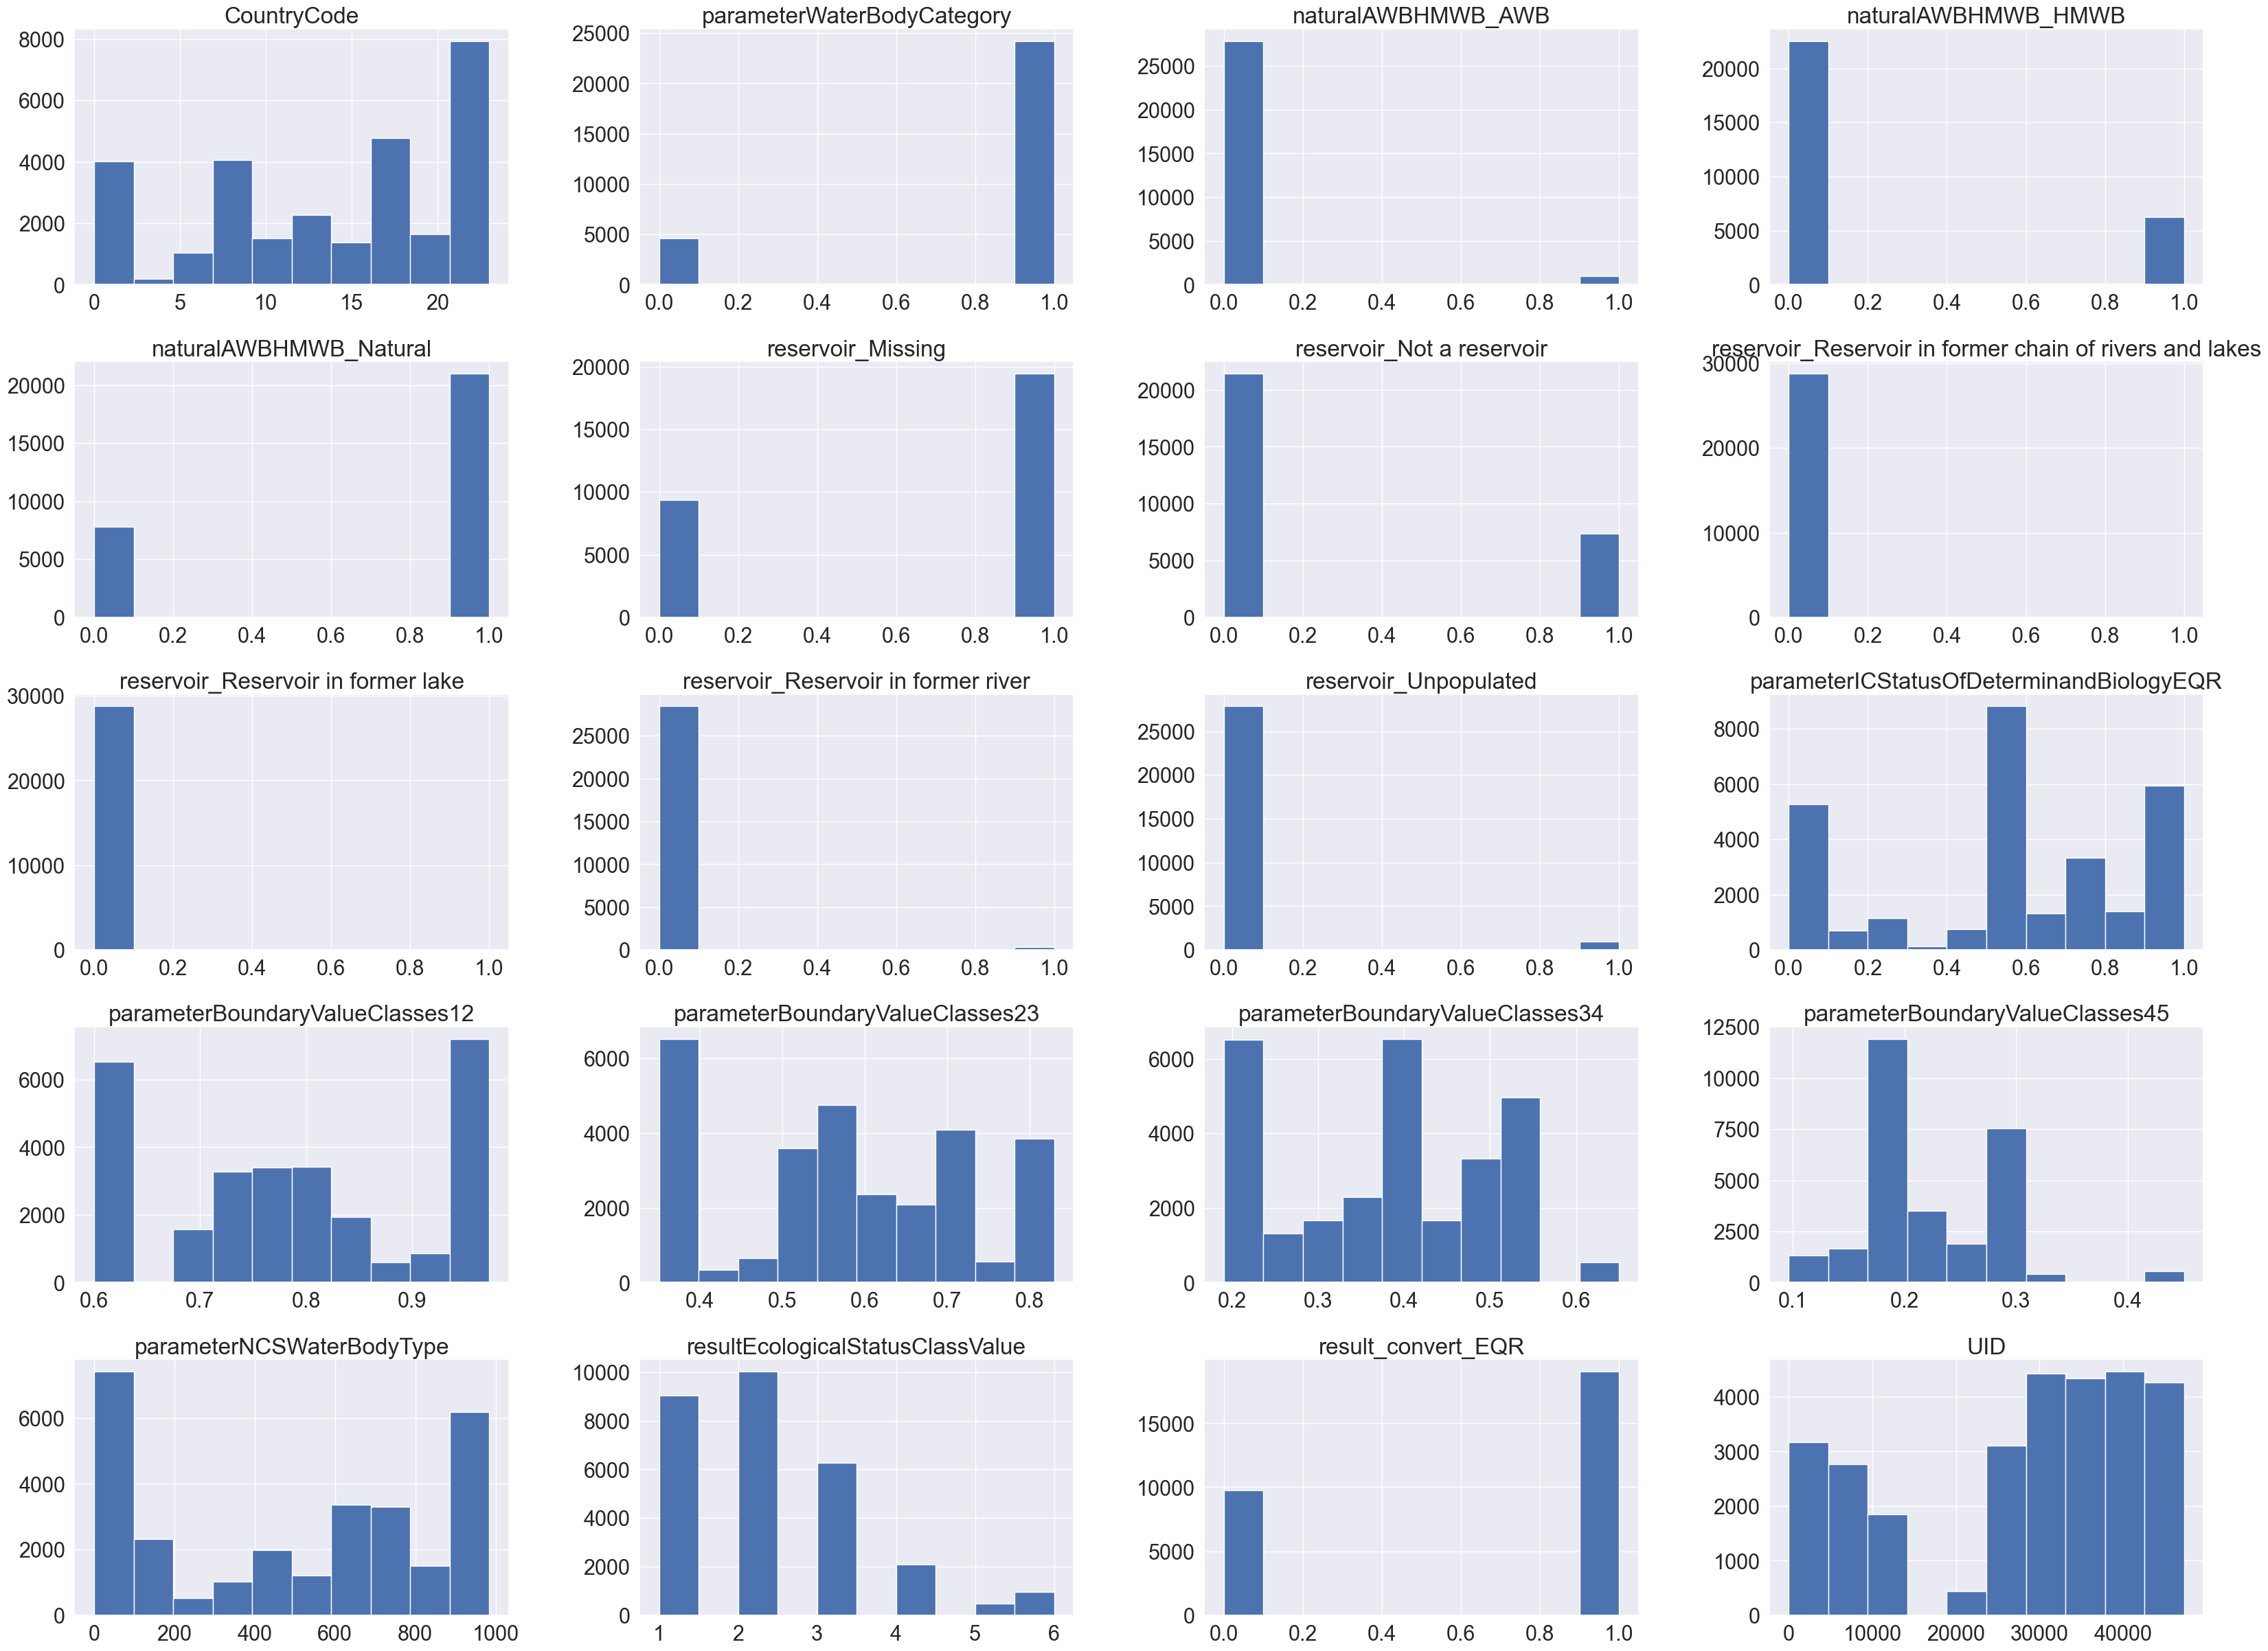

In [56]:
data.hist(figsize=(40,30))
plt.show()